# TD 2022_11_10


______

# Inicialization
______

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import sys
import os

# Modifier la variable du TD en fonction de l'endroit où les données sont stockées
TD_DIR = 'gdrive/My Drive/ENSTA/MI201/2022_11_10'
sys.path.append(TD_DIR)
os.path.exists(TD_DIR)

True

______

# Apprentissage Automatique en Python
______
Étapes d'une démarche d'apprentissage automatique:
1. Constitution de la base d'apprentissage
2. Visualisation des données
3. Choix de l'approche
4. Optimisation
5. Evaluation


## Activité 1.1 : Bayésien naïf.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

from sklearn.model_selection import train_test_split


def showData(X, Y, title: str="", figX: int=6, figY: int=6):
    fig, ax = plt.subplots(figsize=(figX, figY))

    for id in np.unique(Y):
        idpositive = np.nonzero(Y == id)[0]
        ax.scatter(X[idpositive, 0], X[idpositive, 1], s=50)

    fig.suptitle(title)

# extraction data from file
dataPath = os.path.join(TD_DIR,'data_banknote_authentication.txt')
X = np.loadtxt(dataPath, delimiter=',')

y = X[:, -1]  # saving answer
X = X[:,:-1]  # removing answer

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=42,
                                                    stratify=y,
                                                    test_size=0.8)

### Visualisation des données

In [ ]:
def plotHist(dim0: int=4, dim1: int=4, figX: int=6, figY: int=6):
  for i in range(dim0):
    for j in range(dim1):
      if i != j:
        title = "Distribution: (" + str(i) + ", " + str(j) + ")"

        # Distributions 2D
        showData(X_train[:,[i, j]], y_train, title)
        plt.show()

        X0 = X_train[y_train == 0,:]
        X1 = X_train[y_train == 1,:]

        # Visualise les distributions pour un attribut
        a1 = X0[:, i]
        b1 = X1[:, i]

        #Visualise les histogrammes
        plt.figure(figsize = (figX, figY))
        plt.hist(a1, color='b', alpha=0.5, bins=20, label=['class 0'])
        plt.hist(b1, color='g', alpha=0.5, bins=20, label=['class 1'])
        plt.legend(loc='upper right')
        plt.title(title)
        plt.show()

        print("\n\n")

plotHist()

### Choix de l'approche

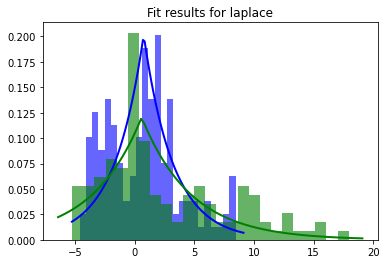

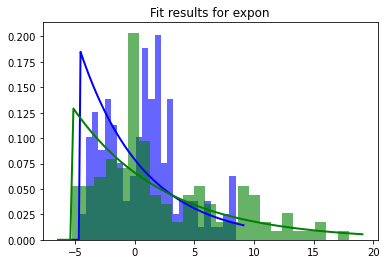

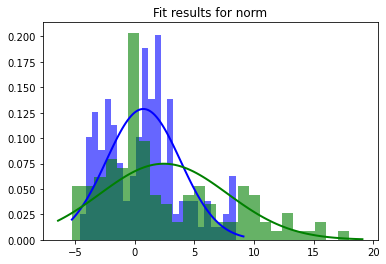

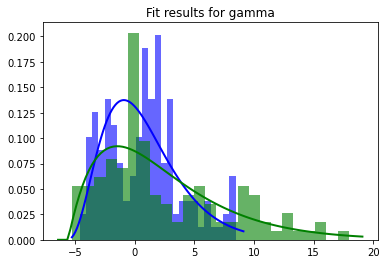

/usr/local/lib/python3.7/dist-packages/scipy/stats/_continuous_distns.py:639: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


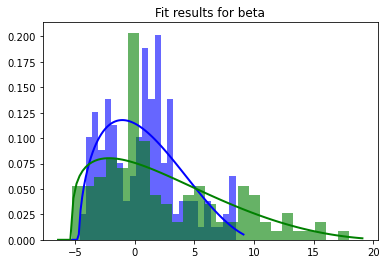

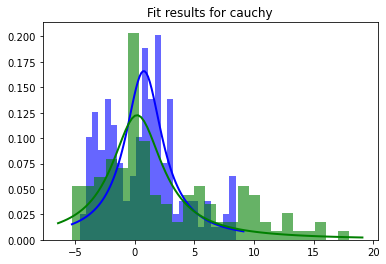

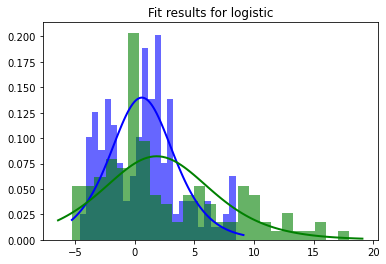

In [ ]:
from pickle import NONE
from scipy.stats import laplace, expon, norm, gamma, beta, cauchy, logistic

distributionList = [laplace, expon, norm, gamma, beta, cauchy, logistic]


def plot(distribution) -> NONE :
  # Choix de la caractéristique
  feat1 = 2
  a1 = X0[:,feat1]
  b1 = X1[:,feat1]

  # Visualise les distributions pour une caractéristique
  plt.clf()

  data = a1
  param = distribution.fit(data)

  # Plot the histogram.
  plt.hist(data, bins=25, density=True, alpha=0.6, color='b')

  # Plot the PDF.
  xmin, xmax = plt.xlim()
  x = np.linspace(xmin, xmax, 100)
  p = distribution.pdf(x, *param)
  plt.plot(x, p, 'b', linewidth=2)

  data = b1
  param = distribution.fit(data)

  # Plot the histogram.
  plt.hist(data, bins=25, density=True, alpha=0.6, color='g')

  # Plot the PDF.
  xmin, xmax = plt.xlim()
  x = np.linspace(xmin, xmax, 100)
  p = distribution.pdf(x, *param)
  plt.plot(x, p, 'g', linewidth=2)

  title = "Fit results for %s" % distribution.name
  plt.title(title)

  plt.show()


for distribution in distributionList:
  plot(distribution)

<div class="alert alert-block alert-success">
QUESTION: Quelle est la famille de distributions la plus simple pour décrire les données?
</div>

**Réponse**

normal

### Optimisation du modèle

<div class="alert alert-block alert-info">
Ecrire une fonction d'estimation qui renvoie le modèle de distribution ou ses paramètres pour l'ensemble des lois conditionnelles. Ce sera le résultat de votre apprentissage! Appliquez-la sur les distributions de chacune des deux classes.
</div>

In [ ]:
def build_model(data, distrib):
    params = []
    dimensions = data.shape[1]

    for n in range(dimensions):
      params.append(distrib.fit(data[:,n]))

    return params

distrib = laplace

param0 = build_model(X0, distrib)
param1 = build_model(X1, distrib)


<div class="alert alert-block alert-info">
Ecrire une fonction 'compute_log_likelihood' qui prédit la classe à partir des données et des modèles de distributions en utilisant une approche bayésienne naïve:
$$\log P[y|\mathbf{x}] \propto \sum_{i=1}^N \log P[x_i|y] + \log P[y]$$
pour chacune des classes $y$ et une donnée à prédire $\mathbf{x}$.
</div>

In [ ]:
def compute_log_likelihood(data, distrib, params):
    # METTRE VOTRE CODE ICI
    #
    #
    #
    return llk


### Evaluation

<div class="alert alert-block alert-info">
Tester les performances du classifieur sur les données d'apprentissage et de test. Pour cela, écrivez une fonction de prédiction utilisant le modèle, appliquez-le sur les données de test et comparez aux vraies valeurs.
</div>

In [ ]:
def predic_bayesien_naif(data, distrib, param0, param1):       
    # METTRE VOTRE CODE ICI
    #
    #
    #
    #
    return y_predic


y_train_predic = predic_bayesien_naif(X_train, distrib, param0, param1)
y_test_predic = predic_bayesien_naif(X_test, distrib, param0, param1)


nerr_train = (y_train_predic != y_train).sum()
nerr_test = (y_test_predic != y_test).sum()

print("Taux d'erreur sur données de train = {:.1f}%".format(100*nerr_train/X_train.shape[0]))
print("Taux d'erreur sur données de test = {:.1f}%".format(100*nerr_test/X_test.shape[0]))


NameError: name 'param0' is not defined

<div class="alert alert-block alert-success">
QUESTION: Expliquez les différences des valeurs de performance entre ensembles d'apprentissage et de test.
</div>

**Réponse**


## Activité 1.2: Plus proches voisins
On va reproduire la séquence d'activité précédente en développant une approche de type 'plus proches voisins', et la valider sur le même jeu de données.

### Choix du modèle


<div class="alert alert-block alert-info">
Les principaux paramètres du modèle sont le type de distance ou de mesure de similarité, et le nombre de voisins à utiliser pour prendre une décision.
</div>

In [ ]:
# Choix de la distance de similarité
dist_name = 'euclidean'

# Choix du nombre de voisins
k = 5

### Optimisation


<div class="alert alert-block alert-info">
L'apprentissage d'une approche 'plus proches voisins' consiste simplement à collecter les exemples d'apprentissage et leurs classes.
</div>

In [ ]:
# Apprentissage
Bdd_samples = X_train
Bdd_classes = y_train

### Evaluation


<div class="alert alert-block alert-info">
L'évaluation consiste à vérifier que la fonction de prédiction appliquée sur le jeu de test produit des classes identiques à la vérité terrain. 
<br><br>
Ecrivez le corps de la fonction de prédiction 'predic_kNN' prenant en entrée l'ensemble de test, et les paramètres de l'algorithme du plus proche voisin. 
<br><br>
Vous pouvez utiliser les fonctions de calcul de matrices de similarité <a href=https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.cdist.html>cdist</a>, les fonctions de tri de numpy <a href=https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html>argsort</a> et les fonctions de statistiques sur des collections implémentées directement en Python dans la classe <a href=https://docs.python.org/3/library/collections.html#collections.Counter>Counter</a>. Avec ces fonctions, l'algorithme peut tenir en moins de 10 lignes.

</div>

In [ ]:

### Calcul de la distance

from scipy.spatial import distance
from collections import Counter

def predic_kNN(X_test, samples, classes, dist_name, k):
    # METTRE VOTRE CODE ICI
    #
    #
    #    
    return y_predic

y_predic = predic_kNN(X_test, Bdd_samples, Bdd_classes, dist_name, k)
nerr = (y_predic != y_test).sum()

print("Taux d'erreur de test {:.1f}%".format(100*nerr/X_test.shape[0]))

NameError: name 'y_predic' is not defined

<div class="alert alert-block alert-success">
QUESTION: quelles sont les différences principales par rapport au modèle précédent (Bayésien naïf)?
</div>

**Réponse**



___
# Partie 2 : Utilisation de scikit-learn
___


On se propose dans cette partie d'utiliser la librarie [scikit-learn](http://scikit-learn.org/stable/modules/classes.html) qui contient un rand nombre d'algorithmes d'apprentissage et une interface facile d'utilisation, divisée en deux types de fonctionnalités: 'fit' et 'predict'.

Le nouveau problème d'apprentissage est une classification binaire de textes en provenance de [newsgroups](https://en.wikipedia.org/wiki/Usenet_newsgroup), c'est-à-dire des forums de discussion sur une certaine thématique. L'objectif de la classification est de prédire le groupe où le document a été posté uniquement à partir du texte. 

Une première étape de mise en forme des données sous forme vectorielle a été réalisée et utilise une technique de "sac de mots" (["bag of words"](https://en.wikipedia.org/wiki/Bag-of-words_model) en anglais). Les données sont de grande taille, mais très creuses (beaucoup de valeurs nulles par échantillon).

<div class="alert alert-block alert-info">

Chargez les données visualisez quelques exemples. Calculez le nombre moyen de valeurs non nulles par échantillon.

</div>

In [ ]:
## Lecture des données
#class0 = 3 #'comp.sys.ibm.pc.hardware',
#class1 = 4 #'comp.sys.mac.hardware'

class0 = 13 # 'sci.med'
class1 = 14 # 'sci.space'


npzfile = np.load(os.path.join(TD_DIR,'2newsgroup_{:d}_{:d}.npz').format(class0,class1),allow_pickle=True)
X = npzfile['arr_0'].tolist().todense()

y = X[:,-1].getA1()
X = X[:,:-1]

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=42,
                                                    stratify=y,
                                                    test_size=0.3)

print("Les données sont de dimension {:d}".format(X_train.shape[1]))
print("Le nombre de données d'apprentissage est {:d}".format(y_train.shape[0]))

# MODIFIER LE CODE ICI
non_nul_moyen = 78789797
print("Le nombre moyen de valeurs non nulles par échantillon est {:.1f}".format(non_nul_moyen))


Les données sont de dimension 24412
Le nombre de données d'apprentissage est 1383
Le nombre moyen de valeurs non nulles par échantillon est 78789797.0


## Activité 2.1: bayésien naïf

<div class="alert alert-block alert-info">

La bibliothèque propose une version de l'algorithme [bayésien naif](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.naive_bayes) avec plusieurs types de modèles de distributions de probabilités. Quel est le modèle plus adapté au problème parmi les trois proposés?

<br><br>

Ecrivez ensuite la démarche générique d'apprentissage à partir de la bibliothèque scikit-learn.
</div>

In [ ]:
from sklearn.naive_bayes import BernoulliNB, GaussianNB, MultinomialNB

# METTRE VOTRE CODE ICI
#
#
#

nerr = (y_predic != y_test.ravel()).sum()

print("Taux d'erreur NN = {:.1f}%".format(100*nerr/y_test.shape[0]))


NameError: ignored

## Activité 2.2: Plus proche voisin


<div class="alert alert-block alert-info">

La bibliothèque scikit-learn propose une version de l'algorithme de classification par [k plus proches voisins](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier) avec plusieurs paramétrages possibles.

<br>
Ecrivez la démarche générique d'apprentissage à partir cette bibliothèque, et testez plusieurs paramètres pour améliorer les performances. 

<br><br>
ATTENTION: les calculs peuvent être plus longs que pour les exemples précédents (plusieurs dizaines de secondes). Une possibilité est de limiter la taille de la base de donnée pour sélectionner les bonnes configurations.
<br>

</div>

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import timeit

tic = timeit.default_timer();  

# METTRE VOTRE CODE ICI
#
#
#
#

toc = timeit.default_timer()
print("Temps d'execution = {:.3g} s".format(toc-tic))

nerr = (y_predic != y_test.ravel()).sum()

print("Taux d'erreur NN = {:.1f}%".format(100*nerr/y_test.shape[0]))


Temps d'execution = 3.69e-05 s


NameError: name 'y_predic' is not defined